# Лабораторная работа 2. Линейная регрессия. Градиентный спуск

Вспомним нормальное уравнение:

$$\overrightarrow{w}_{opt} = \left(X^TX\right)^{-1}X^T\overrightarrow{y}.$$

Здесь присутствует обращение матрицы $X^TX$ – довольно трудоёмкая операция при большом количестве признаков: сложность вычислений $O(d^3)$. При решении реальных задач такая трудоёмкость часто оказывается непозволительной, поэтому параметры модели (весовые коэффициенты) ищут итерационными методами, стоимость которых меньше. Один из них – *градиентный спуск* (gradient descent – ['greɪdɪənt dɪ'sent]).

Напомним, что в градиентном спуске значения параметров на следующем шаге получаются из значений параметров на текущем шаге смещением в сторону антиградиента функционала ошибки: 

$$\overrightarrow{w}^{(k+1)} = \overrightarrow{w}^{(k)} - \eta_k \nabla Q(\overrightarrow{w}^{(k)}),$$
где $\eta_k$ – шаг градиентного спуска.

Формула градиента функционала ошибки выглядит следующим образом:

$$\nabla Q(\overrightarrow{w}) = \nabla_\overrightarrow{w}\left(\frac{1}{l}\|X\overrightarrow{w}-\overrightarrow{y}\|^2\right) = \frac{2}{l}X^T(X\overrightarrow{w} - \overrightarrow{y}).$$
 
Сложность вычислений в данном случае $O(dl)$.

In [86]:
import numpy as np
import matplotlib.pyplot as plt

**Задание 1. Реализация градиентного спуска**  

Напишите функцию `gradient_descent`, которая находит вектор весов на основе градиентного спуска.  

В качестве критериев остановки можно использовать максимальное количество шагов и/или количество шагов, при котором отсутствуют значимые изменения весов.

Проверьте работу функции на простом примере из лекций:

$$x_1=2, x_2=3, x_3=5,$$

$$y_1=1, y_2=3, y_3=4.$$

Нарисуйте исходные данные и полученную линию регресии при помощи ``matplotlib``: для рисования точек используйте ``plt.scatter``, для рисования линии – ``plt.plot``.  

Сравните полученные результаты с результатами, полученными на основе нормального уравнения.

In [87]:
x = np.array([2, 3, 5])
y = np.array([1, 3, 4])

In [88]:
def gradient_descent(X, y, lr=0.01, max_iter=1000, eps=1e-6):
    X = X.reshape(-1, 1)
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    m = len(y)
    theta = np.array([np.random.choice(X[:, 1]), np.random.choice(X[:, 1])])
    # print(theta)
    # loss_history = []
    iterations = 1
    for _ in range(max_iter):
        iterations += 1
        predictions = X.dot(theta)
        gradient = (1 / m) * X.T.dot(predictions - y)
        new_theta = theta - lr * gradient
        loss = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
        # loss_history.append(loss)
        if np.linalg.norm(new_theta - theta) < eps:
            break
        theta = new_theta
    
    return theta, iterations


In [89]:
theta, loss_history = gradient_descent(x, y)
print("Веса, найденные градиентным спуском:", theta)

Веса, найденные градиентным спуском: [1.01651962 0.54480664]


In [90]:
X = np.c_[np.ones(x.shape[0]), x]
theta_normal = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
print("Веса, найденные нормальным уравнением:", theta_normal)

Веса, найденные нормальным уравнением: [-0.42857143  0.92857143]


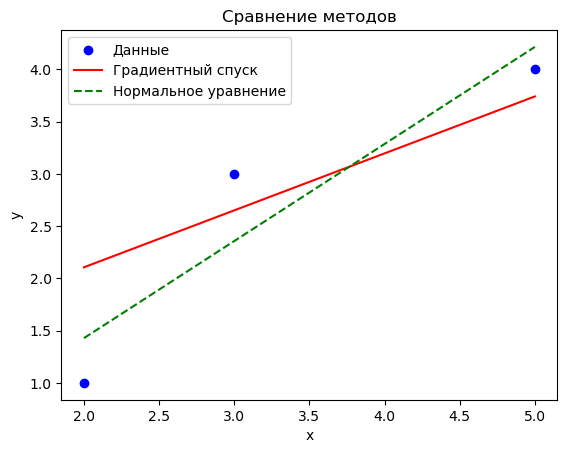

In [91]:
plt.scatter(x, y, color='blue', label='Данные')
y_pred_gd = X.dot(theta)
plt.plot(x, y_pred_gd, color='red', label='Градиентный спуск')
y_pred_ne = X.dot(theta_normal)
plt.plot(x, y_pred_ne, color='green', linestyle='--', label='Нормальное уравнение')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Сравнение методов')
plt.show()


**Задание 2. Исследование скорости спуска**  

Протестируйте функцию `gradient_descent` на наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` для разных значений скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.  

Оцените количество шагов для получения решения в каждом случае.

In [92]:
data_train = np.loadtxt('../data/ml_lab1_train.txt', delimiter=',')
data_test = np.loadtxt('../data/ml_lab1_test.txt', delimiter=',')
X_train = data_train[:, 0]
print(X_train)
y_train = data_train[:, 1]
X_test = data_test[:, 0]
y_test = data_test[:, 1]
for i in [0.5, 1.0, 2.0] :
    print(f"learning rate: {i}")
    theta, iterations = gradient_descent(X_train, y_train, lr=i, max_iter=1000, eps=1e-6)
    print(f"TRAIN: theta = {theta} iterations = {iterations}")
    theta, iterations = gradient_descent(X_test, y_test, lr=i, max_iter=1000, eps=1e-6)
    print(f"TEST: theta = {theta} iterations = {iterations}")

[-0.2  -0.14 -0.08 -0.02  0.04  0.1   0.16  0.22  0.28  0.34  0.4   0.46
  0.52  0.58  0.64  0.7   0.76  0.82  0.88  0.94  1.  ]
learning rate: 0.5
TRAIN: theta = [4.43323788 2.27911902] iterations = 136
TEST: theta = [4.21293968 2.3409806 ] iterations = 108
learning rate: 1.0
TRAIN: theta = [4.43322734 2.27914242] iterations = 78
TEST: theta = [4.21293155 2.34099785] iterations = 62
learning rate: 2.0
TRAIN: theta = [-1.48533129e+134 -6.68955305e+133] iterations = 1001
TEST: theta = [-3.11775795e+139 -1.46920524e+139] iterations = 1001


**Задание 3. Стохастический градиентный спуск**  

Стохастический градиентный спуск отличается от обычного заменой градиента на его оценку по одному или нескольким объектам. В этом случае сложность становится $O(kd)$, где $k$ – количество объектов, по которым оценивается градиент, $k<<l$. Это отчасти объясняет популярность стохастических методов оптимизации.  

Реализуйте функцию `stochastic_gradient_descent`, которая находит вектор весов на основе стохастического градиентного спуска (вычисление градиента на одном случайном примере).  

На наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` оцените количество шагов для получения решения при разных значениях скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.

In [93]:
def stochastic_gradient_descent(X, y, lr=0.01, max_iter=1000, eps=1e-6):
    X = X.reshape(-1, 1)
    X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    m = len(y)
    theta = np.array([np.random.choice(X[:, 1]), np.random.choice(X[:, 1])])
    iterations = 1

    for _ in range(max_iter):
        iterations += 1
        idx = np.random.randint(m)
        X_i = X[idx:idx+1]
        # print("x ",X_i)
        y_i = y[idx]
        # print("y ", y_i)
        prediction = X_i.dot(theta)
        gradient = X_i.T.dot(prediction - y_i)
        new_theta = theta - lr * gradient
        if np.linalg.norm(new_theta - theta) < eps:
            return new_theta, iterations

        theta = new_theta

    return theta, iterations

for i in [0.5, 1.0, 2.0] :
    print(f"learning rate: {i}")
    theta, iterations = stochastic_gradient_descent(X_train, y_train, lr=i, max_iter=1000, eps=1e-6)
    print(f"TRAIN: theta = {theta} iterations = {iterations}")
    theta, iterations = stochastic_gradient_descent(X_test, y_test, lr=i, max_iter=1000, eps=1e-6)
    print(f"TEST: theta = {theta} iterations = {iterations}")

learning rate: 0.5
TRAIN: theta = [4.1080264  2.02686558] iterations = 1001
TEST: theta = [3.9982261  1.60954305] iterations = 1001
learning rate: 1.0
TRAIN: theta = [4.30878177 1.82491724] iterations = 403
TEST: theta = [3.92066041 1.3159297 ] iterations = 1001
learning rate: 2.0
TRAIN: theta = [-3.67897008e+123 -3.74416447e+123] iterations = 1001
TEST: theta = [-3.88786663e+125  2.01295500e+125] iterations = 1001


**Задание 4. Градиентный спуск по мини-батчам**  

Реализуйте функцию `mini_batch_gradient_descent`, которая находит вектор весов на основе градиентного спуска по мини-батчам (вычисление градиента на подмножестве случайно выбранных примеров). Размер мини-батча должен быть параметром функции.  

На наборе данных `ml_lab1_train.txt`/`ml_lab1_test.txt` оцените количество шагов для получения решения при разных значениях скорости спуска $\eta_k$, например, $\eta_k = \{0.5, 1.0, 2.0\}$.

In [94]:
# Ваш код здесь